## Dataset Creation

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
def getDataframe(filename):
    readFile = open(filename, 'r')
    reader = csv.reader(readFile)

    data = list()  
    for row in reader:
        data.append(row)
    readFile.close()

    df = pd.DataFrame.from_dict(data)

    df.columns = ["Address", "RTT", "MessageSize", "NumberMessages"]
    df["RTT"] = pd.to_numeric(df["RTT"], downcast="float")
    
    return df

In [17]:
resultsFolder = "../bin/results/"
resultsFiles = os.listdir(resultsFolder)

df = getDataframe(resultsFolder+resultsFiles[0])
for i in range(len(resultsFiles)-1):
    df = pd.concat([df, getDataframe(resultsFolder+resultsFiles[i+1])])
print(df.shape)
df.head(5)

(2000, 2)


,Address,RTT
0,http://192.168.15.16:8080/acc,9.0
1,http://192.168.15.16:8080/acc,1.0
2,http://192.168.15.16:8080/acc,3.0
3,http://192.168.15.16:8080/acc,1.0
4,http://192.168.15.16:8080/acc,2.0


## Dataset Statistics

In [18]:
print("Valores Máximos:",df.max()["RTT"])
print("Valores Mínimos:", df.min()["RTT"])
print("Valores Médios:", df.mean()["RTT"])
print("Valores Desvio:", df.std()["RTT"])

Valores Máximos: 18.0
Valores Mínimos: 0.0
Valores Médios: 0.311
Valores Desvio: 0.844174


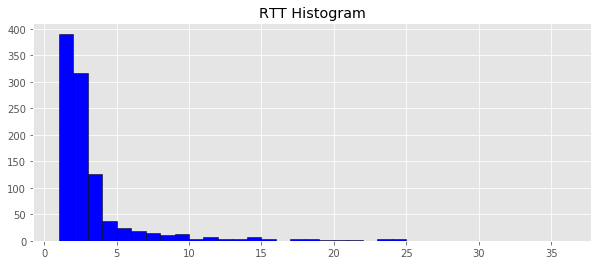

In [19]:
plt.figure(figsize=(10,4))
plt.hist(df['RTT'], bins=range(int(df.min()["RTT"]),int(df.max()["RTT"]),1), 
         histtype='bar', ec='black', color='blue')
plt.title("RTT Histogram")
plt.show()

## Benchmark 1

In [ ]:
df.columns = ["Address", "RTT", "MessageSize", "NumberOfMessages", "NumberOfHosts"]

## Benchmark 2

In [ ]:
df.columns = ["Address", "RTT", "MessageSize", "NumberOfMessages", "NumberOfSenders"]

## Benchmark 3

In [ ]:
df.columns = ["Address", "RTT", "MessageSize", "NumberOfMessages", "PairOfAgents"]

## Benchmark 4

In [ ]:
df.columns = ["Address", "RTT", "MessageSize", "NumberOfMessages", "PairOfAgents", "AgentsLocation"]